### Introduction 

For this project, we're given real estate data from King County. Our job is to create and solve a business problem using a linear regression model. We have total freedom in who our stakeholders are, and what the business problem is. For this project, I'll be using CRoss-Industry Standard Process for Data Mining (CRISP-DM) as my Data Science Process. The steps are as follows. 

1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Modeling
5. Evaluation 

### Business Understanding 

At this stage, we need to think about who are our stakeholders, and how our linear regression model could help them. 

As discussed with my group, our project will cater to first time investors. Our regression model will help advise investors where to spend their money and what they should do with their property once bought. Should they focus on remodeling, and if so, which features will bring in more income? 

We also have the option of catering our model to first time home buyers, which may consist of young adults hoping to start a family. Our model then can help decide which features may best fit their budget given their income. 

### Data Understanding 

We have King County real estate data available to us, listing out the prices for houses in 2014-2015. The dataset lists out the houses' features, including square footage, number of bedrooms and bathrooms, grade and condition, just to name a few. 

We are predicting price, and using all other features as predictors. 

In [1]:
import pandas as pd
housing_data = pd.read_csv('/Users/christianmoya/Documents/Flatiron/Phase_2/dsc-phase-2-project/data/kc_house_data.csv')
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [2]:
housing_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


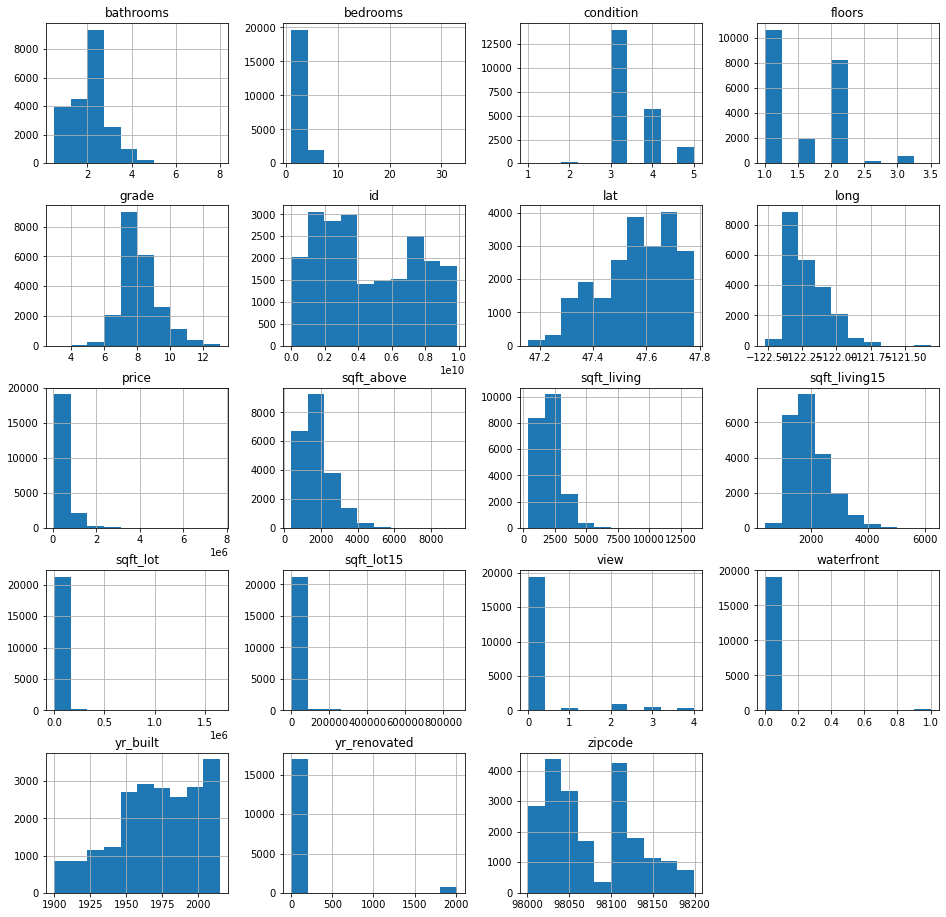

In [3]:
housing_data.hist(figsize=(16,16));

Based on the histograms above, we see that grade is the only feature that really follows a normal distribution. Features like bathrooms and square footage in living space and lot seem to be positively skewed, which may mean there are properties that are significantly larger than the average. Price seems to be positively skewed as well, meaning there may be a couple properties that are priced significantly higher than the average. 

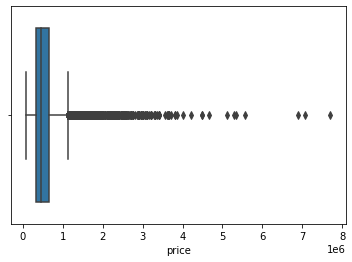

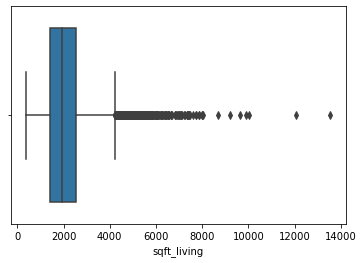

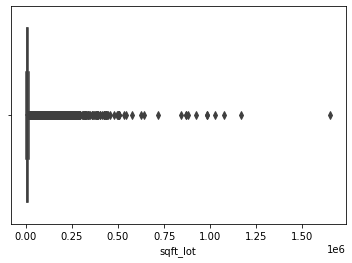

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

ax = sns.boxplot('price', data = housing_data)
plt.show()

ax2 = sns.boxplot('sqft_living', data=housing_data)
plt.show();

ax3 = sns.boxplot('sqft_lot', data = housing_data)
plt.show();

### Data Preparation 

The info we've gathered above shows that we have null values for the following columns: waterfront, view, and year_renovated. We'll go through each of those columns, and decide how we'll go about cleaning those values. We'll also need to check whether null values were simply replaced with another type of string. We'll use value_counts to see if there's any data other we need to clean. 

In [5]:
for col in housing_data.columns:
    try:
        print(col, housing_data[col].value_counts()[:5])
    except:
        print(col, housing_data[col].value_counts())
    print('\n')

id 795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
Name: id, dtype: int64


date 6/23/2014    142
6/26/2014    131
6/25/2014    131
7/8/2014     127
4/27/2015    126
Name: date, dtype: int64


price 350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64


bedrooms 3    9824
4    6882
2    2760
5    1601
6     272
Name: bedrooms, dtype: int64


bathrooms 2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
Name: bathrooms, dtype: int64


sqft_living 1300    138
1400    135
1440    133
1660    129
1010    129
Name: sqft_living, dtype: int64


sqft_lot 5000    358
6000    290
4000    251
7200    220
7500    119
Name: sqft_lot, dtype: 

When we take a look at the data in our columns, we find that the sqft_basement also has the string '?'. We'll want to change this string to make it consistent with the rest of the column. Because over 12,000 data sets have an area of 0.0, it would make the most sense to fill the missing values with the mode. 

Because a majority of our dataset has values of 0.0, with over 19,000 for waterfront and view, and over 17,000 for year_renovated, we'll fill the missing values with the mode as well.  

In [6]:
#replace null values for waterfront, view, and yr_renovated 
for col in housing_data.columns:
    housing_data[col].fillna(value= housing_data[col].mode()[0], inplace = True)
    
#replace '?' in sqft_basement
housing_data['sqft_basement'] = housing_data['sqft_basement'].replace('?', housing_data['sqft_basement'].mode()[0])

In [7]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  float64
 9   view           21597 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [8]:
# Check that changes have been made 
for col in housing_data.columns:
    try:
        print(col, housing_data[col].value_counts()[:5])
    except:
        print(col, housing_data[col].value_counts())
    print('\n')

id 795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
Name: id, dtype: int64


date 6/23/2014    142
6/26/2014    131
6/25/2014    131
7/8/2014     127
4/27/2015    126
Name: date, dtype: int64


price 350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64


bedrooms 3    9824
4    6882
2    2760
5    1601
6     272
Name: bedrooms, dtype: int64


bathrooms 2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
Name: bathrooms, dtype: int64


sqft_living 1300    138
1400    135
1440    133
1660    129
1010    129
Name: sqft_living, dtype: int64


sqft_lot 5000    358
6000    290
4000    251
7200    220
7500    119
Name: sqft_lot, dtype: 

Now that we've checked for null values, we can start to normalize our data, deal with categorical values, and check for multicollinearity. 

In [9]:
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
df = housing_data[features]
df = pd.get_dummies(df, drop_first=True)
df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,sqft_basement_920.0,sqft_basement_930.0,sqft_basement_935.0,sqft_basement_940.0,sqft_basement_946.0,sqft_basement_950.0,sqft_basement_960.0,sqft_basement_970.0,sqft_basement_980.0,sqft_basement_990.0
0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,...,0,0,0,0,0,0,0,0,0,0
1,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,...,0,0,0,0,0,0,0,0,0,0
2,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,...,0,0,0,0,0,0,0,0,0,0
3,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,...,0,0,0,0,0,0,0,0,0,0
4,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,...,0,0,0,0,0,0,0,0,0,0


It seems that the get_dummies method only considered sqft_basement as a category, which does not seem too accurate given the measurement is a continuous variable. For this project, I'll use the zipcode feature as the categorical variable and create dummies for each zip code. 

In [10]:
# Create dummies for zip code and add to housing_data 
dummies = pd.get_dummies(housing_data['zipcode'], prefix='zipcode', drop_first=True)
housing_data_preprocessed = housing_data.drop('zipcode', axis=1)
housing_data_preprocessed = pd.concat([housing_data_preprocessed, dummies], axis=1)
housing_data_preprocessed.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


Next step in getting our data ready would be to normalize our numerical features, which are most of them. I'm wondering if we have to normalize features like waterfront, view, and yr_renovated given that these features with values of 0.0. Would that throw off the normalization? If so, how do we go about those data points? 

In [11]:
#normalize numerical data
def norm_feat(series):
    return (series - series.mean()) / series.std()

numeric_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'grade']
for feat in numeric_features:
    housing_data_preprocessed[feat] = norm_feat(housing_data_preprocessed[feat])

In [12]:
housing_data_preprocessed.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,7129300520,10/13/2014,221900.0,-0.402894,-1.451039,-0.980629,-0.228177,-0.915531,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
1,6414100192,12/9/2014,538000.0,-0.402894,0.174482,0.533357,-0.189735,0.937409,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,5631500400,2/25/2015,180000.0,-1.482459,-1.451039,-1.427201,-0.123137,-0.915531,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,2487200875,12/9/2014,604000.0,0.676671,1.149794,-0.131054,-0.243873,-0.915531,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,1954400510,2/18/2015,510000.0,-0.402894,-0.150622,-0.436030,-0.169499,-0.915531,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


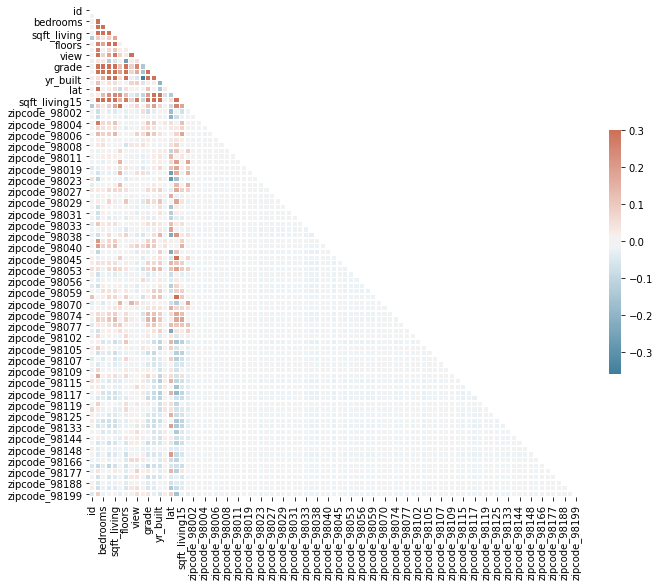

In [13]:
#check for multicollinearity 
import numpy as np

corr = housing_data_preprocessed.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={'shrink': .5});

### Criminality 

In [14]:
crime_data = pd.read_csv('/Users/christianmoya/Downloads/King_County_Sheriff_s_Office_-_Incident_Dataset.csv')
crime_data.head(50)

,case_number,incident_datetime,incident_type,FCR,address_1,city,state,zip,created_at,updated_at,hour_of_day,day_of_week,Incident Block Location
0,C19045456,11/27/2019 02:10:00 PM,Other,377,8700 Block 250TH AVE NE,REDMOND,WA,98053,12/02/2019 11:55:00 PM,12/03/2019 01:47:00 AM,14,Wednesday,POINT (-122.00566700000002 47.679241)
1,C19045392,11/27/2019 08:00:00 AM,Traffic,427,BECKLER RD & MP 4.6,SKYKOMISH,WA,98288,12/02/2019 10:25:00 PM,12/03/2019 12:16:00 AM,8,Wednesday,NaN
2,C19047596,11/20/2019 11:38:00 AM,Property Crime,331,NFD 6028 & HWY 2,BARING,WA,5474,12/17/2019 11:15:00 PM,12/17/2019 11:56:00 PM,11,Wednesday,NaN
3,C19044352,11/19/2019 02:38:00 PM,Drugs,200,1 Block AVE S & S KING ST,SEATTLE,WA,98144,12/02/2019 05:05:00 PM,12/02/2019 06:56:00 PM,14,Tuesday,NaN
4,C19044243,11/18/2019 11:06:00 PM,Traffic,404,I,KENT,WA,NaN,11/26/2019 08:55:00 PM,11/26/2019 10:46:00 PM,23,Monday,NaN
5,C19044643,11/10/2019 11:00:00 AM,Other,323,1 Block AVE & COLUMBIA ST,SEATTLE,WA,98104,11/21/2019 11:55:00 PM,11/22/2019 01:46:00 AM,11,Sunday,NaN
6,C19043669,11/07/2019 12:00:00 AM,Assault,160,21700 Block NE 87TH PL,REDMOND,WA,98053,11/18/2019 11:55:00 PM,11/19/2019 01:46:00 AM,0,Thursday,POINT (-122.04992199999998 47.679931)
7,C19042139,11/01/2019 04:00:00 PM,Theft of Vehicle,300,27500 Block 43RD AVE S,AUBURN,WA,98001,11/07/2019 08:35:00 PM,11/19/2019 02:44:00 AM,16,Friday,NaN
8,C19041869,11/01/2019 07:00:00 AM,Breaking & Entering,274,28600 Block KENT BLACK DIAMOND RD SE,KENT,WA,98042,11/05/2019 05:45:00 PM,11/05/2019 07:37:00 PM,7,Friday,NaN
9,C19043372,10/31/2019 12:00:00 AM,Property Crime,184,16100 Block 140TH PL NE,WOODINVILLE,WA,98072,11/15/2019 06:06:00 PM,11/15/2019 07:57:00 PM,0,Thursday,NaN


In [15]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20449 entries, 0 to 20448
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   case_number              20449 non-null  object
 1   incident_datetime        20449 non-null  object
 2   incident_type            20449 non-null  object
 3   FCR                      20449 non-null  int64 
 4   address_1                20449 non-null  object
 5   city                     20449 non-null  object
 6   state                    20449 non-null  object
 7   zip                      20133 non-null  object
 8   created_at               20449 non-null  object
 9   updated_at               20449 non-null  object
 10  hour_of_day              20449 non-null  int64 
 11  day_of_week              20449 non-null  object
 12  Incident Block Location  17713 non-null  object
dtypes: int64(2), object(11)
memory usage: 2.0+ MB


In [16]:
crime_data.describe()

,FCR,hour_of_day
count,20449.000000,20449.000000
mean,317.490929,11.997653
std,124.615875,6.953160
min,101.000000,0.000000
25%,232.000000,7.000000
50%,300.000000,13.000000
75%,377.000000,18.000000
max,661.000000,23.000000


In [17]:
crime_data['incident_type'].value_counts()

Other                         6893
Property Crime                2298
Assault                       1578
Theft                         1348
Theft from Vehicle            1270
Breaking & Entering           1245
Theft of Vehicle              1063
Traffic                        765
Vehicle Recovery               756
Other Sexual Offense           594
Drugs                          470
Community Policing             454
Death                          437
Disorder                       273
Robbery                        220
Fire                           210
Weapons Offense                174
Sexual Assault                 107
Liquor                          93
Arson                           83
Assault with Deadly Weapon      59
Missing Person                  48
Kidnapping                       8
Homicide                         3
Name: incident_type, dtype: int64

In [82]:
# Classify each crime as a violent crime or property crime as defined by the Bureau of Justice Statistics

# Create function that says whether incident type is a property crime
def prop_crime(row):
    if 'Property Crime' in row or 'Theft' in row:
        return 1
    else:
        return 0

# Create function that says whether incident type is a violent crime 
def viol_crime(row):
    if 'Assault'in row or 'Offense' in row or 'Robbery' in row or 'Kidnapping' in row or 'Homicide' in row:
        return 1
    else: 
        return 0

# Create two new columns that share boolean if incident type is a property crime or violent crime
crime_data['property_crime'] = crime_data['incident_type'].apply(lambda row: prop_crime(row))
crime_data['violent_crime'] = crime_data['incident_type'].apply(lambda row: viol_crime(row))

# Subset for 2020 data 
import datetime as dt 
crime_data['date'] = pd.to_datetime(crime_data['incident_datetime'])
crimedata_2019 = crime_data[crime_data['date'].dt.year == 2019]

crimedata_2019.head(100)

,case_number,incident_datetime,incident_type,FCR,address_1,city,state,zip,created_at,updated_at,hour_of_day,day_of_week,Incident Block Location,property_crime,violent_crime,date
0,C19045456,11/27/2019 02:10:00 PM,Other,377,8700 Block 250TH AVE NE,REDMOND,WA,98053,12/02/2019 11:55:00 PM,12/03/2019 01:47:00 AM,14,Wednesday,POINT (-122.00566700000002 47.679241),0,0,2019-11-27 14:10:00
1,C19045392,11/27/2019 08:00:00 AM,Traffic,427,BECKLER RD & MP 4.6,SKYKOMISH,WA,98288,12/02/2019 10:25:00 PM,12/03/2019 12:16:00 AM,8,Wednesday,NaN,0,0,2019-11-27 08:00:00
2,C19047596,11/20/2019 11:38:00 AM,Property Crime,331,NFD 6028 & HWY 2,BARING,WA,5474,12/17/2019 11:15:00 PM,12/17/2019 11:56:00 PM,11,Wednesday,NaN,1,0,2019-11-20 11:38:00
3,C19044352,11/19/2019 02:38:00 PM,Drugs,200,1 Block AVE S & S KING ST,SEATTLE,WA,98144,12/02/2019 05:05:00 PM,12/02/2019 06:56:00 PM,14,Tuesday,NaN,0,0,2019-11-19 14:38:00
4,C19044243,11/18/2019 11:06:00 PM,Traffic,404,I,KENT,WA,NaN,11/26/2019 08:55:00 PM,11/26/2019 10:46:00 PM,23,Monday,NaN,0,0,2019-11-18 23:06:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,C19032171,08/22/2019 02:51:00 PM,Traffic,424,4500 Block ISSAQUAH,SAMMAMISH,WA,NaN,08/24/2019 12:06:00 AM,08/26/2019 07:49:00 PM,14,Thursday,NaN,0,0,2019-08-22 14:51:00
154,C19041176,10/27/2019 02:46:00 PM,Other,324,7400 Block S 116TH ST,SEATTLE,WA,98178,10/28/2019 03:46:00 PM,10/28/2019 05:37:00 PM,14,Sunday,POINT (-122.24094600000001 47.498875),0,0,2019-10-27 14:46:00
156,C19041554,10/30/2019 02:24:00 AM,Drugs,200,27200 Block MILITARY RD S,KING COUNTY,WA,98001,10/30/2019 03:05:00 PM,10/30/2019 04:58:00 PM,2,Wednesday,POINT (-122.292991 47.356934),0,0,2019-10-30 02:24:00
159,C19032130,08/22/2019 09:30:00 AM,Other,510,9600 Block 15TH AVE SW,SEATTLE,WA,98106,08/22/2019 11:05:00 PM,08/23/2019 05:37:00 PM,9,Thursday,POINT (-122.35401800000001 47.51706600000001),0,0,2019-08-22 09:30:00


In [83]:
crime_stats = crimedata_2019.groupby(['zip']).agg('sum')
crime_stats = crime_stats[['property_crime', 'violent_crime']]
crime_stats.head(50)

,property_crime,violent_crime
zip,,
10013,1,0
33135,1,0
44118,0,0
46902,0,0
5474,1,0
5906,0,0
6704,1,0
68849,0,1
77056,1,0


### Population Data

In [54]:
# Retrieved from https://www.ofm.wa.gov/washington-data-research/population-demographics/population-estimates/small-area-estimates-program

pop_data = pd.read_excel('/Users/christianmoya/Downloads/saep_zcta510p.xlsx')
pop_data.head(100)

king_county_pop = pop_data[pop_data['Estimates of Total Population for ZIP Code Tabulation Areas by County Part'] == 'King']
king_county_pop.head()

kingcounty_pop2020 = king_county_pop[['Estimates of Total Population for ZIP Code Tabulation Areas by County Part', 'Unnamed: 2', 'Unnamed: 24']]
kingcounty_pop2020.columns = ['county', 'zip', 'population_2020']
kingcounty_pop2020.head()


,county,zip,population_2020
183,King,98001,36261.1
184,King,98002,35149.6
185,King,98003,49847.7
186,King,98004,36271.1
187,King,98005,20516.7


In [109]:
# Join population data with crime statistics dataframe 
kingcounty_crime = kingcounty_pop2020.join(crime_stats, on='zip')
# Remove population with 0 
kingcounty_crime = kingcounty_crime[kingcounty_crime['population_2020'] != 0]
kingcounty_crime.tail()

,county,zip,population_2020,property_crime,violent_crime
265,King,98198,37597.5,10.0,14.0
266,King,98199,21594.7,0.0,1.0
267,King,98224,311.004,1.0,1.0
268,King,98288,378.322,10.0,5.0
269,King,98354,1134.98,NaN,NaN


In [99]:
# Create function to calculate crime per capita 
def crime_per_capita(crime, population):
    crime_per_capita = crime/population * 100000
    return crime_per_capita

In [110]:
# Add columns for violent crime per capita, property crime per capita, and total crime per capita
kingcounty_crime['propertycrime_percapita'] = kingcounty_crime['property_crime'] / kingcounty_crime['population_2020'] * 100000
kingcounty_crime['violentcrime_percapita'] = kingcounty_crime['violent_crime'] / kingcounty_crime['population_2020'] * 100000
kingcounty_crime.tail()                                        
                                                               

,county,zip,population_2020,property_crime,violent_crime,propertycrime_percapita,violentcrime_percapita
265,King,98198,37597.5,10.0,14.0,26.5975,37.2365
266,King,98199,21594.7,0.0,1.0,0,4.63077
267,King,98224,311.004,1.0,1.0,321.539,321.539
268,King,98288,378.322,10.0,5.0,2643.25,1321.63
269,King,98354,1134.98,NaN,NaN,NaN,NaN


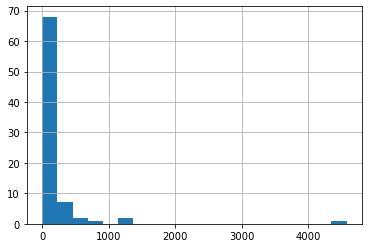

In [106]:
kingcounty_crime['violentcrime_percapita'].hist(bins=20)

In [ ]:
housing_data.join